In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import scipy.stats as st
import plotly.express as px
import plotly.graph_objects as go


In [8]:
data = pd.read_csv('train.csv')

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
data.shape

(1460, 81)

<Axes: >

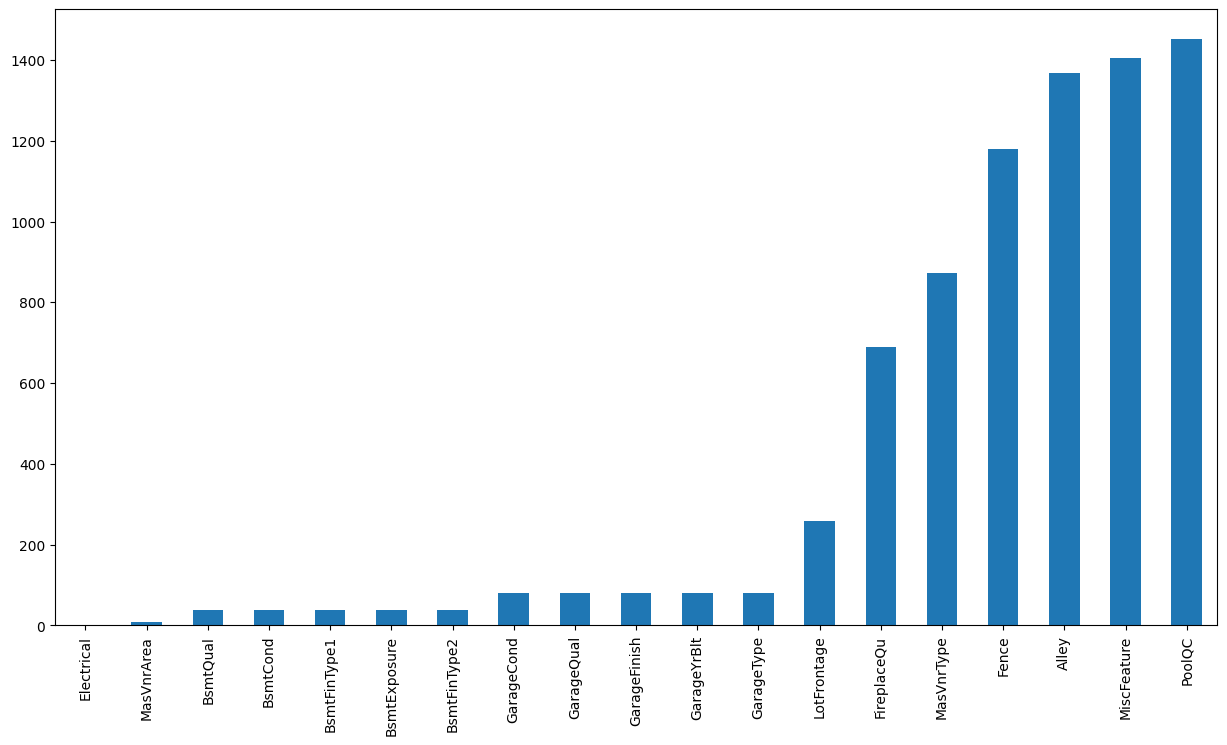

In [13]:
# counting missing value
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

In [99]:
# Menghapus kolom dengan missing values sangat tinggi
threshold = 0.5
cols_to_drop = missing[missing > threshold * data.shape[0]].index
data.drop(columns=cols_to_drop, inplace=True)

In [101]:
# Mengisi kolom numerik dengan median
numeric_cols = data.select_dtypes(include=[np.number]).columns
imputer_numeric = SimpleImputer(strategy='median')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

# Mengisi kolom kategorikal dengan mode
categorical_cols = data.select_dtypes(include=[object]).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

In [104]:
print (missing)

Series([], dtype: int64)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22440\226975432.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], kde=False, bins=20);


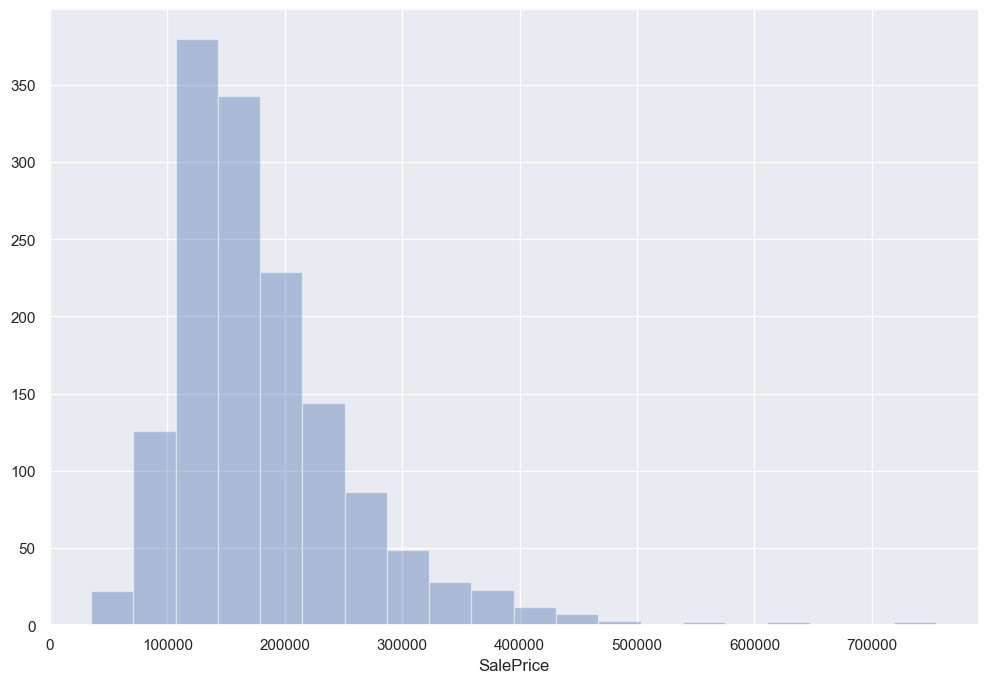

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'], kde=False, bins=20);


<Axes: xlabel='SalePrice', ylabel='Density'>

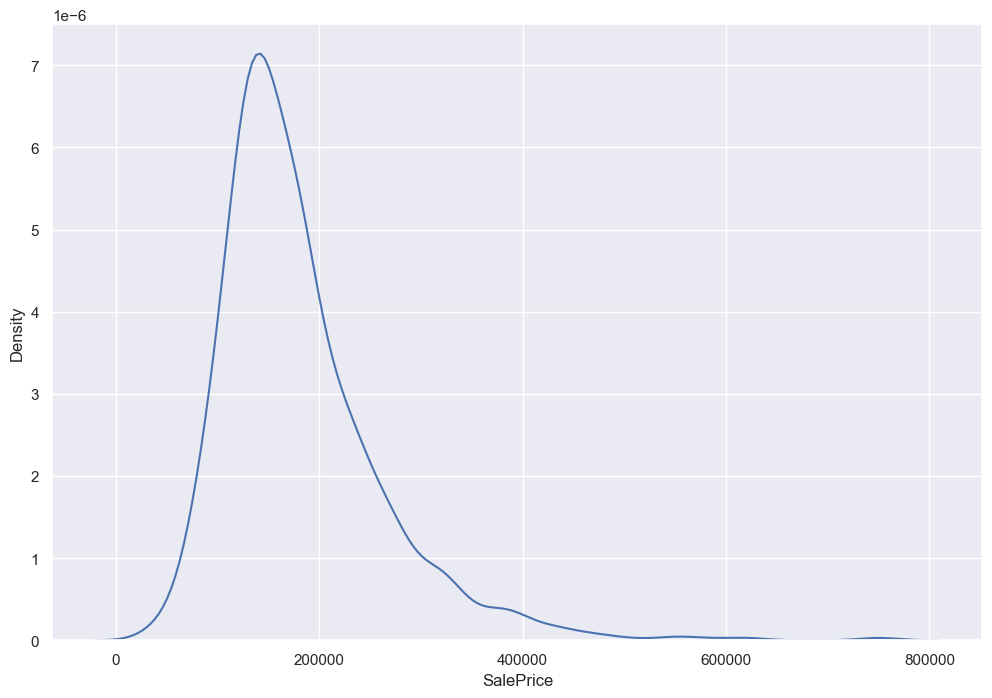

In [13]:
sns.kdeplot(data['SalePrice'])

In [14]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
# Correlation
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'correlation of Numeric Features with Sale Price'}>

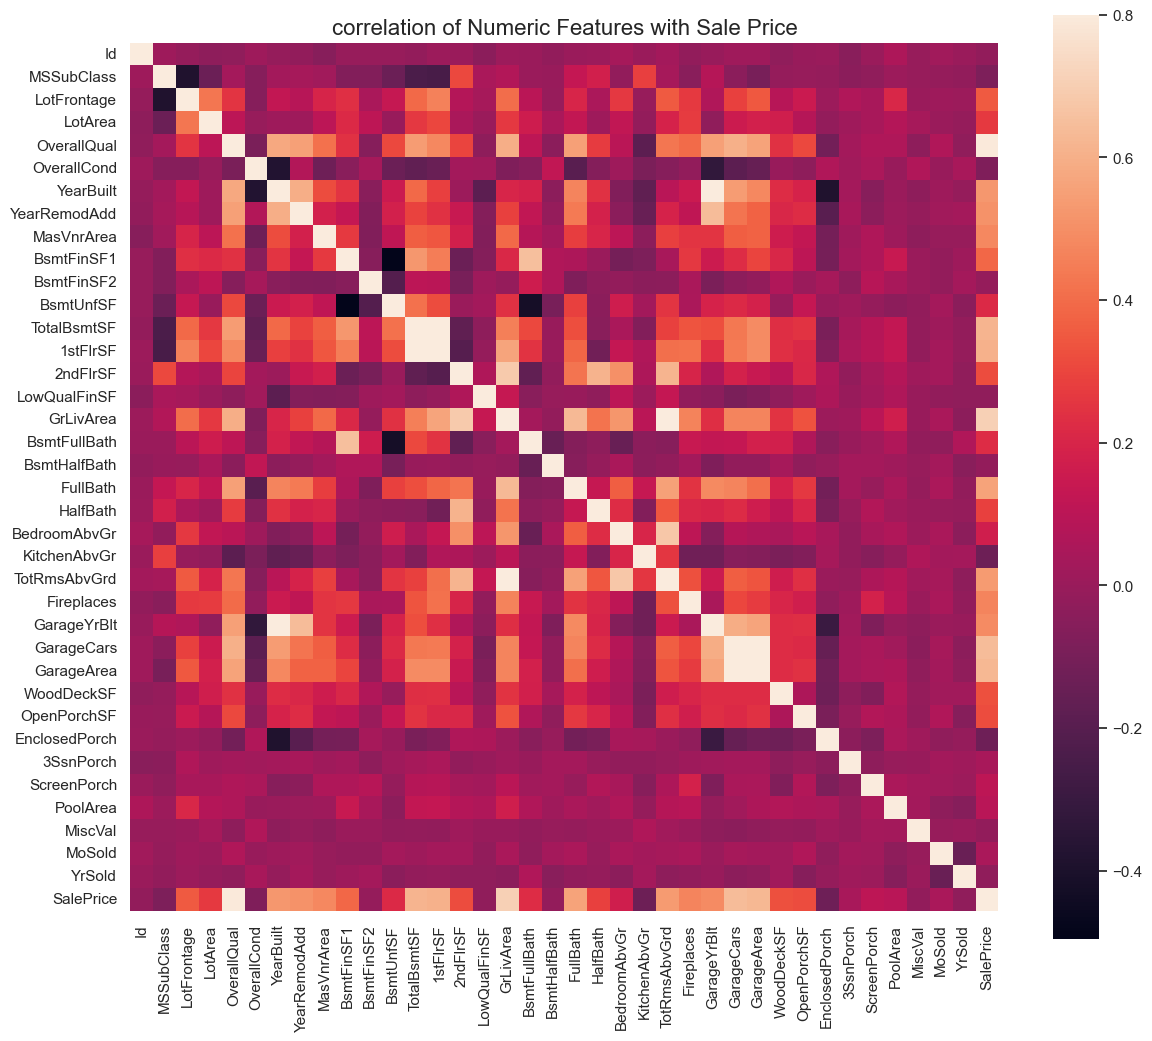

In [20]:
f , ax = plt.subplots(figsize = (14,12))
plt.title ('correlation of Numeric Features with Sale Price', y=1,size=16)
sns.heatmap(correlation,square = True, vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

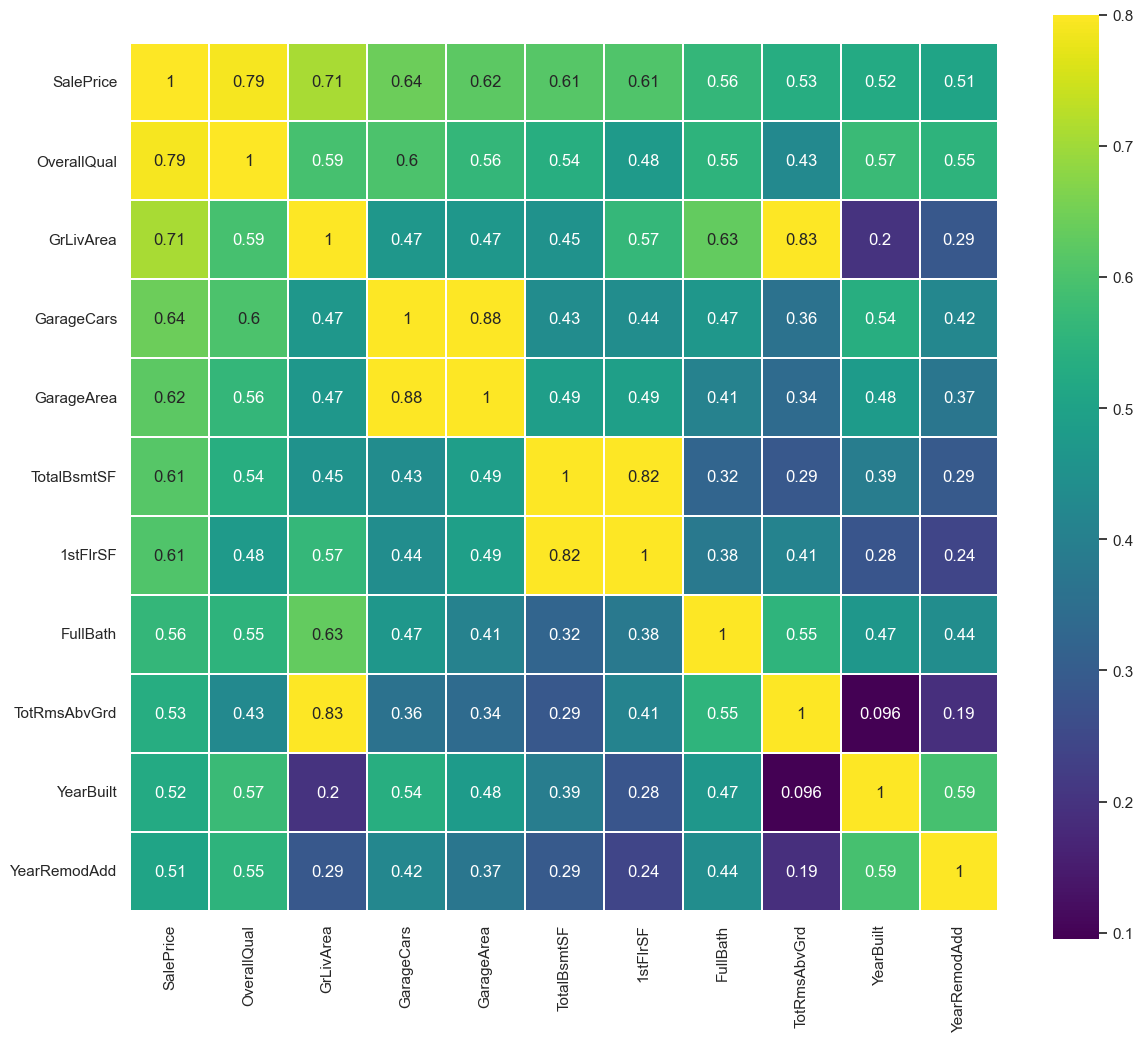

In [23]:
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white",xticklabels=cols.values, annot_kws= {'size':12},yticklabels = cols.values)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

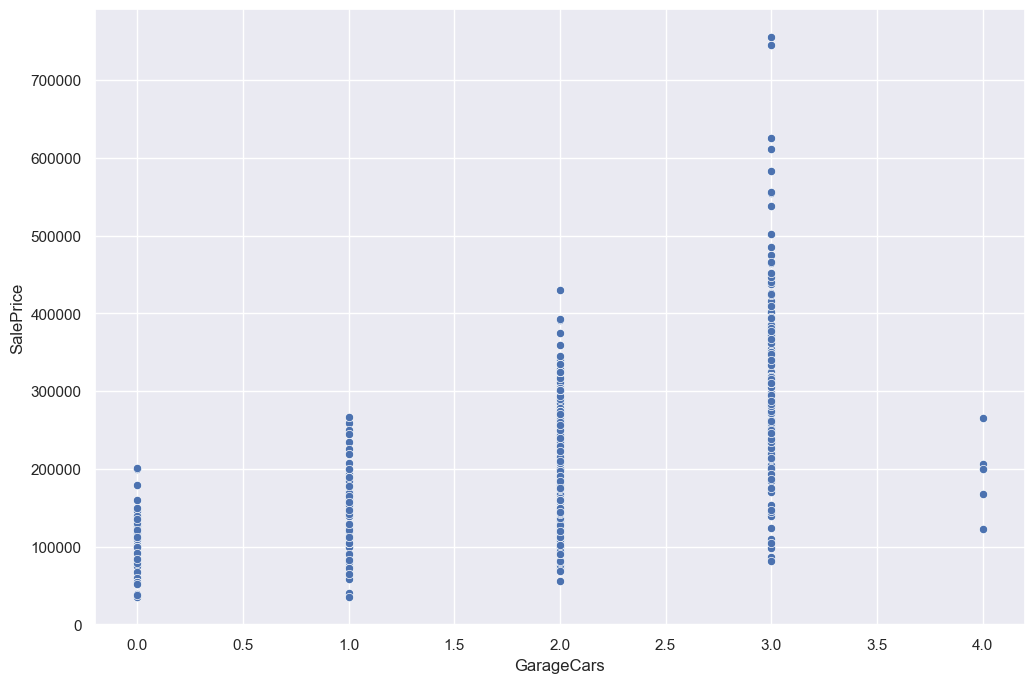

In [24]:
sns.scatterplot(x='GarageCars', y='SalePrice',data = data)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

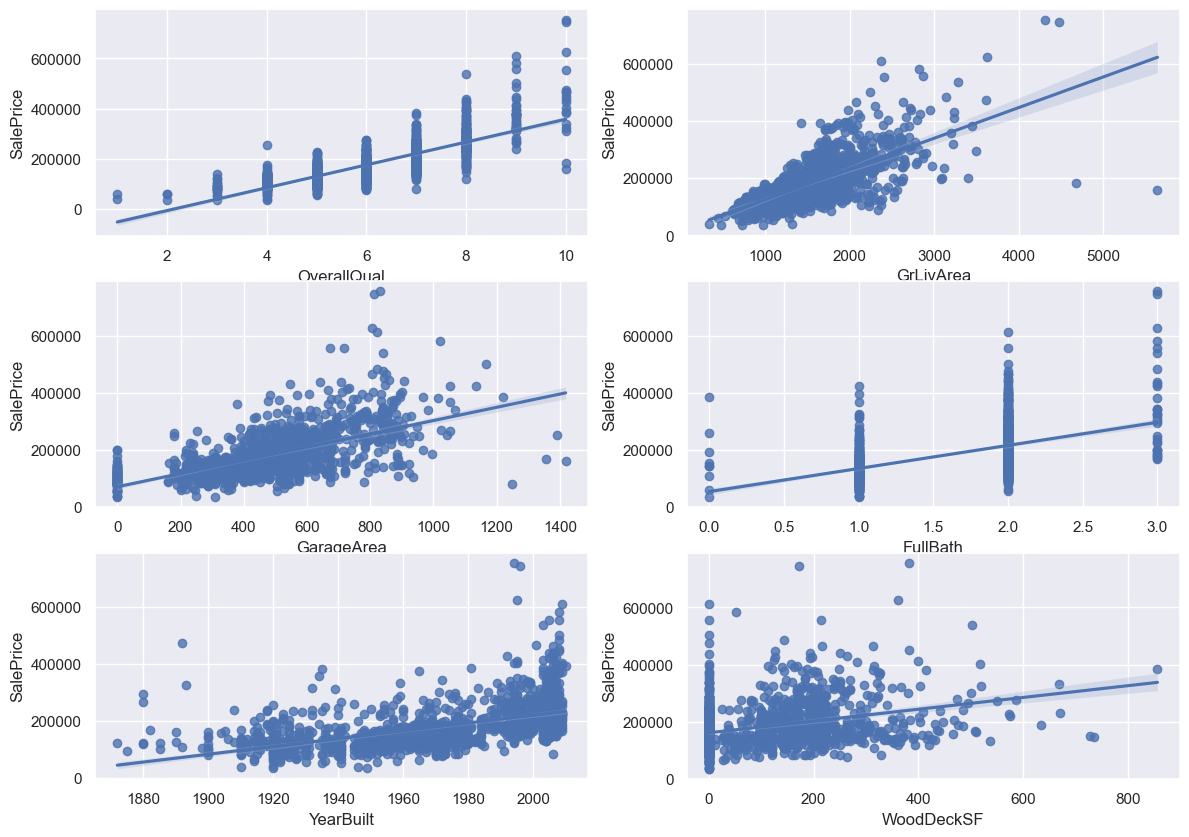

In [26]:
# Catterplots between the most correlated variables

fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots (nrows=3, ncols=2, figsize=(14,10))
sns.regplot(x='OverallQual', y='SalePrice',data = data,scatter= True, fit_reg=True, ax=ax1)
sns.regplot(x='GrLivArea', y='SalePrice',data = data,scatter= True, fit_reg=True, ax=ax2)
sns.regplot(x='GarageArea', y='SalePrice',data = data,scatter= True, fit_reg=True, ax=ax3)
sns.regplot(x='FullBath', y='SalePrice',data = data,scatter= True, fit_reg=True, ax=ax4)
sns.regplot(x='YearBuilt', y='SalePrice',data = data,scatter= True, fit_reg=True, ax=ax5)
sns.regplot(x='WoodDeckSF', y='SalePrice',data = data,scatter= True, fit_reg=True, ax=ax6)

Remove Outliars

In [29]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice'>

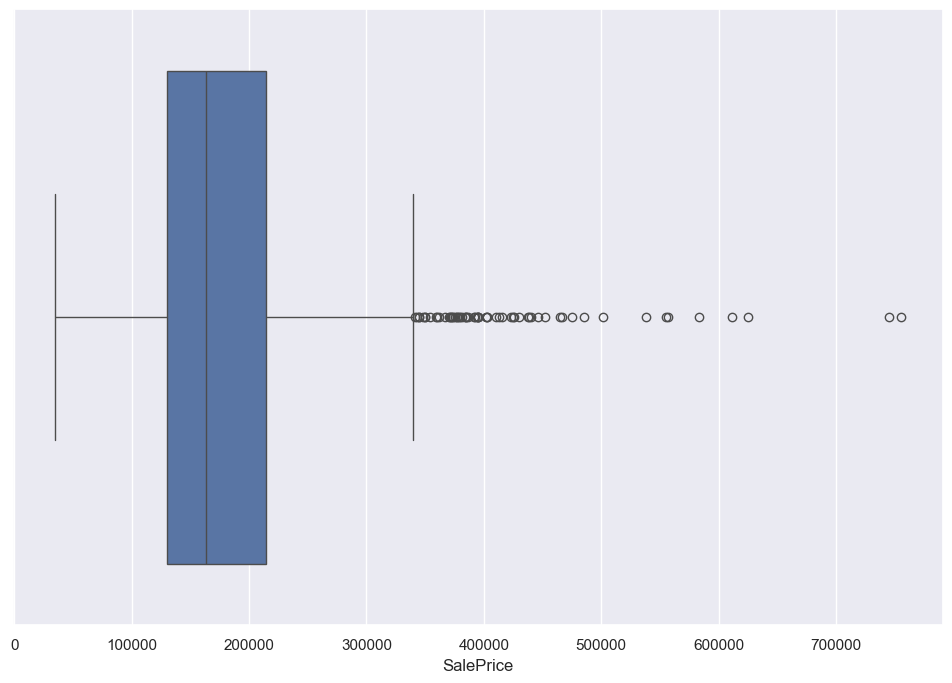

In [27]:
sns.boxplot(x=data["SalePrice"])

In [32]:
first_quartile = data['SalePrice'].quantile(.25)
third_quartile = data['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [33]:
new_boundary = third_quartile + 3*IQR

In [34]:
data.drop(data[data['SalePrice']>new_boundary].index,axis =0, inplace=True)

In [35]:
data.shape

(1448, 81)

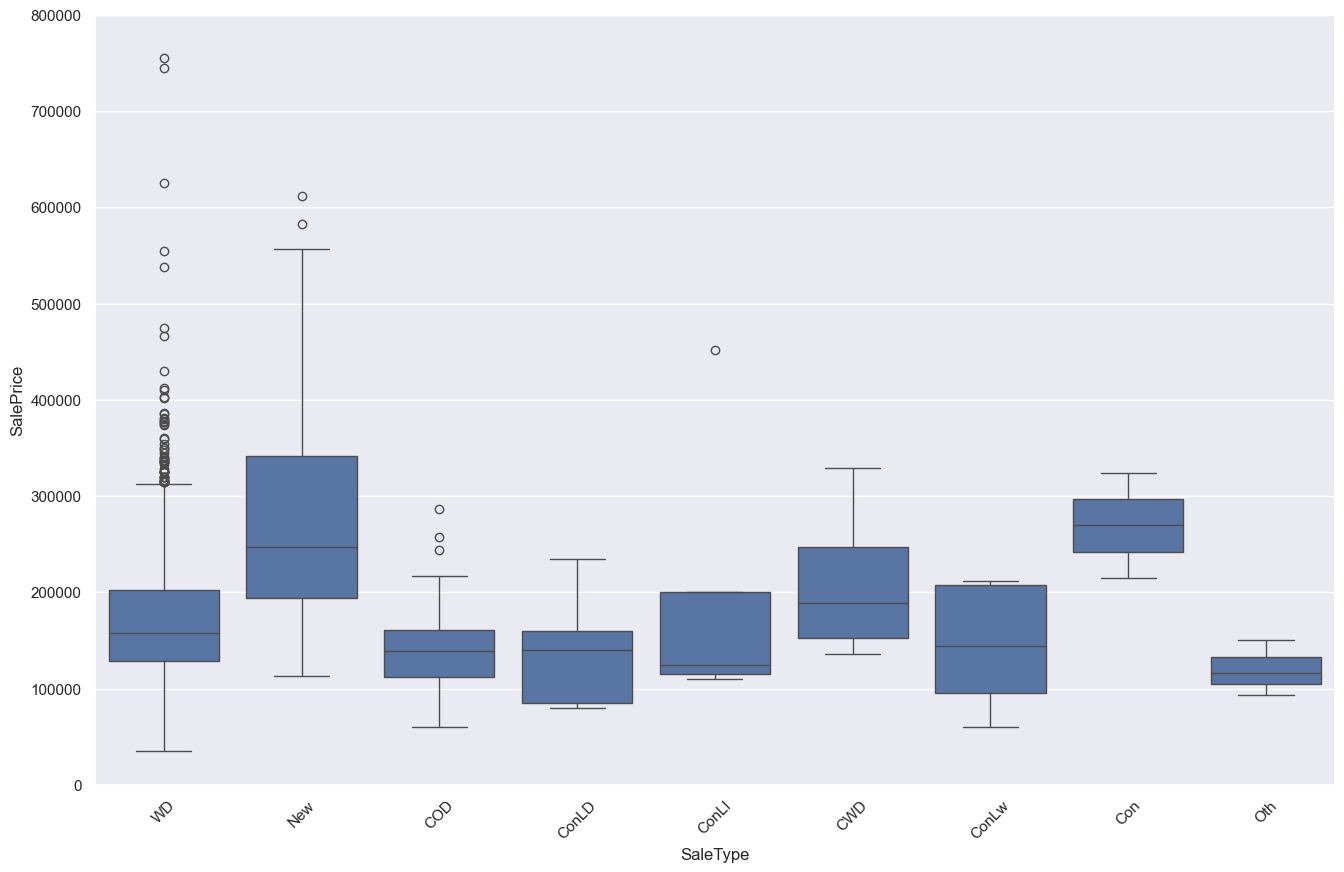

In [28]:
f, ax = plt.subplots(figsize = (16,10))
fig = sns.boxplot(x='SaleType', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt=plt.xticks(rotation=45)

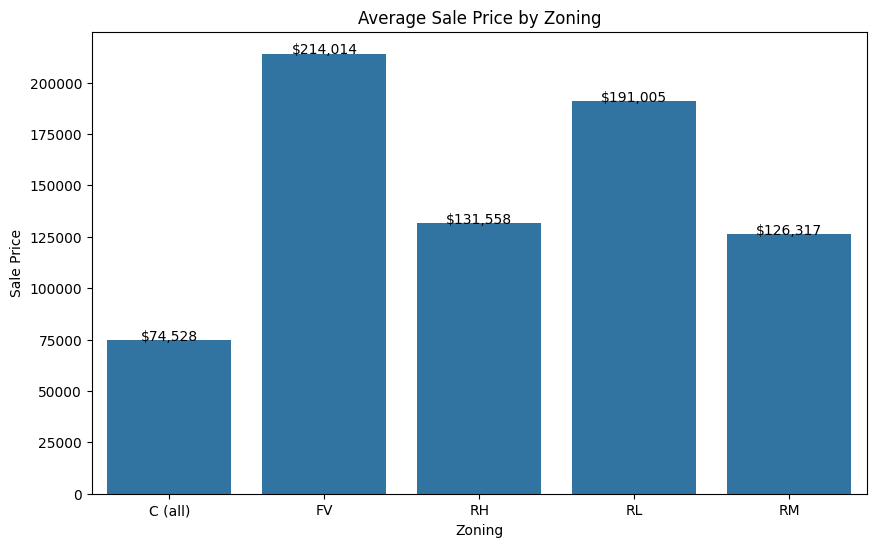

In [42]:
# Zoning impact on sale price
zoning_prices = data.groupby('MSZoning')['SalePrice'].mean().reset_index()

# Membuat plot batang menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='MSZoning', y='SalePrice', data=zoning_prices)

plt.title('Average Sale Price by Zoning')
plt.xlabel('Zoning')
plt.ylabel('Sale Price')

# Menambahkan teks pada setiap batang
for index, row in zoning_prices.iterrows():
    plt.text(row.name, row.SalePrice, f'${row.SalePrice:,.0f}', color='black', ha="center")
    
plt.show()

In [45]:
grouped_data = data.groupby('MSZoning')['SalePrice'].apply(list)

# Melakukan ANOVA
f_value, p_value = st.f_oneway(*grouped_data)
print(f"F-value: {f_value}")
print(f"p-value: {p_value}")

# Menentukan signifikansi hasil
if p_value < 0.05:
    print("Zoning memiliki pengaruh signifikan terhadap harga jual rumah.")
else:
    print("Zoning tidak memiliki pengaruh signifikan terhadap harga jual rumah.")

F-value: 43.84028167245718
p-value: 8.817633866272648e-35
Zoning memiliki pengaruh signifikan terhadap harga jual rumah.


In [54]:
# Correlation antara Living Area dan Sale Price
living_area_price_corr = data['GrLivArea'].corr(data['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price : {living_area_price_corr}')

# Scatter plot
fig10 = px.scatter(data, x='GrLivArea', y='SalePrice',
                   title='Living Area (above grade) vs Sale Price',
                   color='GrLivArea',color_continuous_scale='Blues')
fig10.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', 
                    font=dict(color='white'))
fig10.show()

Correlation between Living Area (above grade) and Sale Price : 0.7086244776126521


In [71]:
#Box plot
yearly_avg_sale_price = data.groupby('YrSold')['SalePrice'].mean()

fig= px.box(data, x= 'YrSold', y='SalePrice', title = 'Sale Price Trends Over the Years', 
              points=False, color_discrete_sequence=['green'])
fig.add_trace(px.line(x=yearly_avg_sale_price.index, y=yearly_avg_sale_price.values).data[0])
fig.update_traces(line=dict(color='purple',width=4),selector=dict(type='scatter',mode='lines'))

for year, avg_price in yearly_avg_sale_price.items():
    fig.add_annotation(
        x=year,
        y=avg_price,
        text=f"{avg_price:,.0f}",
        font=dict(color='white'),
        showarrow=False,
        bgcolor='rgba(128, 0, 128, 0.6)'
        )

fig.update_layout(
    font=dict(color='black'),
    xaxis_title ='Year Sold',
    yaxis_title='Sale Price'
)
fig.show()